In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/luminar/dataset/haarcascade_frontalface_default.xml')

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/luminar/logicplum/cillian23.jpeg')

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


In [ ]:
for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Calculate positions of facial features for emotion analysis
    roi_gray = gray[y:y + h, x:x + w]

    # Calculate average pixel intensity in the region of eyes and mouth
    avg_intensity = int(roi_gray[roi_gray.shape[0] // 2, roi_gray.shape[1] // 2])

    # Analyze average intensity to predict emotions
    if avg_intensity < 100:
        emotion = "Sad"
    elif avg_intensity < 140:
        emotion = "Neutral"
    else:
        emotion = "Happy"

    # Display emotion label near the face
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

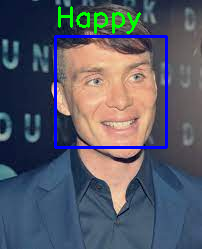

In [ ]:
# Display the image with detected faces and emotions
cv2_imshow(image)